In [6]:
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utilsVisualize import getModelDataNum
import numpy as np

In [7]:
mode = "TEST"
modelNames = ["p2", "p4", "p8", "p16", "m1", "m2", "m4", "m8", "m16", "m32"]
visualizeMode = "PHI_MAPE"
# visualizeMode = "PHI_MSE"
# visualizeMode = "FE_DIFFERENCE"
# visualizeMode = "PHI_AVE"
cutoffRow = None

In [8]:
dfWideArray = []
for modelName in modelNames:
    df, dfLong, dfWide, dfS7 = getModelDataNum(
        modelName, mode, visualizeMode=visualizeMode, cutoffRow=cutoffRow
    )
    print(modelName, df.shape)
    dfWideArray.append(dfWide)

p2 (801, 50)
p4 (401, 50)
p8 (201, 50)
p16 (101, 44)
m1 (1601, 50)
m2 (801, 50)
m4 (401, 50)
m8 (201, 50)
m16 (101, 50)
m32 (51, 50)


In [9]:
import matplotlib.colors as mcolors
mcolors.TABLEAU_COLORS
colors = list(mcolors.TABLEAU_COLORS.values())
print(colors)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


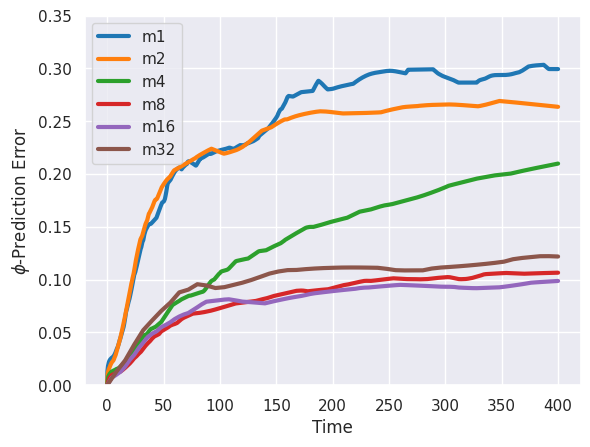

In [10]:
figMode = "ML"
# figMode = "PFC"
numErrBars = 60

if figMode == "PFC":
    dfWideArrayFilt = dfWideArray[:4]
    modelNamesFilt = modelNames[:4]
elif figMode == "ML":
    dfWideArrayFilt = dfWideArray[4:]
    modelNamesFilt = modelNames[4:]
else:
    dfWideArrayFilt = dfWideArray
    modelNamesFilt = modelNames
    
sns.set_theme()
fig, ax = plt.subplots()
for idx, (dfWide, modelName) in enumerate(zip(dfWideArrayFilt, modelNamesFilt)):
    xp = dfWide.index.values
    yp = dfWide["median"].values
    errU = dfWide["upper_whisker"].values
    errL = dfWide["lower_whisker"].values

    errIdx = np.linspace(0, len(xp) - 1, numErrBars, dtype=int)
    err = np.vstack((errL[errIdx], errU[errIdx]))

    ax.plot(xp, yp, marker=None, label=modelName, linewidth=3, color=colors[idx])
    # ax.errorbar(x=xp[errIdx], y=yp[errIdx], yerr=err, fmt="none", color=colors[idx], alpha=0.2)
    # ax.set_title(visualizeMode)
    ax.set_xlabel("Time")
    ax.set_ylabel('$\phi$-Prediction Error')
    ax.set_ylim([0, 0.35])

plt.legend()
cwd = sys.path[0]
filenamePrefix = 'MAPE-time'
filename = f'{filenamePrefix}-{figMode}.png'
filePath = os.path.join(os.getcwd(), 'o8_visualize', filename)
plt.savefig(filePath, dpi=300, bbox_inches="tight")